In [1]:
import torch
from torch.autograd import Variable

In [2]:
batch_size, input_size, hidden_size, output_size = 64, 1000, 100, 10
learning_rate = 1e-4  # 1e-6 is too small here with nn

In [3]:
x = Variable(torch.randn(batch_size, input_size), requires_grad = False) # False is default
y = Variable(torch.randn(batch_size, output_size), requires_grad = False)

There are no w1, w2!

### torch.nn
Base class for all neural network modules. (Your models should also subclass this class.)  
- Module   
The Module is the main building block, it defines the base class for all neural network and you MUST subclass it.


- Sequential  
Sequential is a container of Modules that can be stacked together and run at the same time.
    - we have to store into self everything. 
    
    
https://towardsdatascience.com/pytorch-how-and-when-to-use-module-sequential-modulelist-and-moduledict-7a54597b5f17

In [4]:
model = torch.nn.Sequential(
        torch.nn.Linear(input_size, hidden_size),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden_size, output_size))

loss_fn = torch.nn.MSELoss(reduction = 'sum')

In [5]:
print(model)

Sequential(
  (0): Linear(in_features=1000, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)


In [6]:
print(loss_fn)

MSELoss()


In [7]:
all_losses = []

for i in range(500):
    # forward
    prediction = model(x)
    
    # loss
    loss = loss_fn(prediction, y)
#     print('i = %d, loss = %d' %(i, loss.data))
    all_losses.append(loss)
    
    # backward
    model.zero_grad() # same as 'weights.grad.data.zero_()', optimizer.zero_grad()
    loss.backward()
    
    for parameter in model.parameters():
        parameter.data -= learning_rate * parameter.grad.data

In [8]:
loss.data

tensor(1.8752e-07)

In [9]:
loss.grad_fn

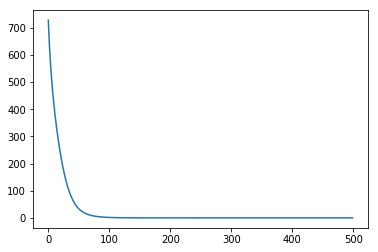

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)